In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.optimize import curve_fit

In [260]:
# create a series
s = pd.Series([1,3,5,4,6,8])
s

0    1
1    3
2    5
3    4
4    6
5    8
dtype: int64

In [29]:
data = pd.read_csv('dati_catena.txt',sep = '\t')
data.columns = ['Qin', 'Vpremax', 'errx', 'erry']
data

,Qin,Vpremax,errx,erry
0,58.737151,0.92,0,0.023284
1,66.079295,1.04,0,0.024000
2,73.421439,1.14,0,0.024645
3,80.763583,1.26,0,0.025473
4,88.105727,1.36,0,0.026203
5,95.447871,1.48,0,0.027123
6,102.790015,1.60,0,0.028087
7,110.132159,1.68,0,0.028752
8,117.474302,1.80,0,0.029779
9,124.816446,1.90,0,0.030661


In [42]:
def linfit(x, a, b):
    return a + b * x

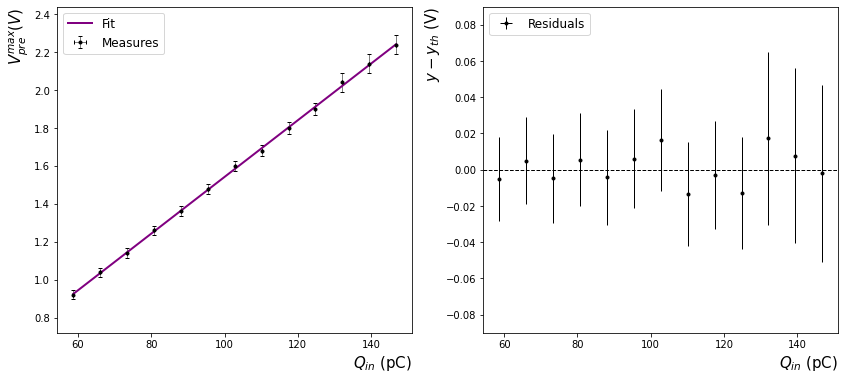

In [161]:
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

par, cov = curve_fit(f = linfit, xdata = data.Qin, ydata = data.Vpremax, sigma = data.erry)

ax1.errorbar(data.Qin, data.Vpremax, xerr=0, yerr=data.erry, marker = '.',
             elinewidth=0.5, color = 'black', linewidth=0, capsize=2, label = 'Measures')
ax1.plot(data.Qin, linfit(data.Qin, *par_lin), color = 'purple', linewidth = 2, label = 'Fit')

y_max = data.Vpremax.max() + 0.2
y_min = data.Vpremax.min() - 0.2

ax1.set_xlabel('$Q_{in}$ (pC)', fontsize = 15, loc = 'right')
ax1.set_ylabel('$V_{pre}^{max} (V)$', fontsize = 15, loc = 'top')

ax1.set_ylim(bottom = y_min, top = y_max)

ax1.legend(loc = 2 ,prop = {'size': 12}, ncol = 1) 

# calcolo i reisidui 

y_th = linfit(data.Qin, *par) 
res = data.Vpremax - y_th 


ax2.errorbar(data.Qin, res, xerr = 0, yerr = data.erry, marker = '.', linewidth = 0, elinewidth= 1 , color = 'black', label = 'Residuals')
ax2.axhline(color = 'black', linewidth = 1, linestyle = '--')
ax2.set_ylim( bottom = -0.09, top = 0.09)
ax2.set_xlabel('$Q_{in}$ (pC)', fontsize = 15, loc = 'right')
ax2.set_ylabel('$y - y_{th} $ (V)', fontsize = 15, loc = 'top')
ax2.legend( loc = 2, prop = {'size': 12}, ncol = 1)
plt.show()



In [254]:
# chi square
chi = np.sum((res/data.erry)**2)
chisq = 'chi2 = ' + format(chi, '1.2f')
print(chisq)


chi2 = 1.16


In [173]:
# errore a posteriori 

err_post_squared = np.sum(res**2) / (len(data) - len(par) )
err_post = 'err_post = ' + format(np.sqrt(err_post_squared))
print(err_post)

err_post = 0.010218528524077852


In [178]:
# get fit parameters 

a = par[0]
b = par[1]
err = np.sqrt(np.diag(cov))
err_a = err[0]
err_b = err[1]
 
a = 'a = (' + format(a,'1.2f') + '±' + format(err_a,'1.2f') + ' )V'
 
b = 'b = (' + format(b, '1.4f') + '±' + format(err_b, '1.4f') + ' ) pF^-1'
err_a, err_b, a,b

(0.01012672627102375,
 0.00010602846649248067,
 'a = (0.05±0.01 )V',
 'b = (0.0149±0.0001 ) pF^-1')

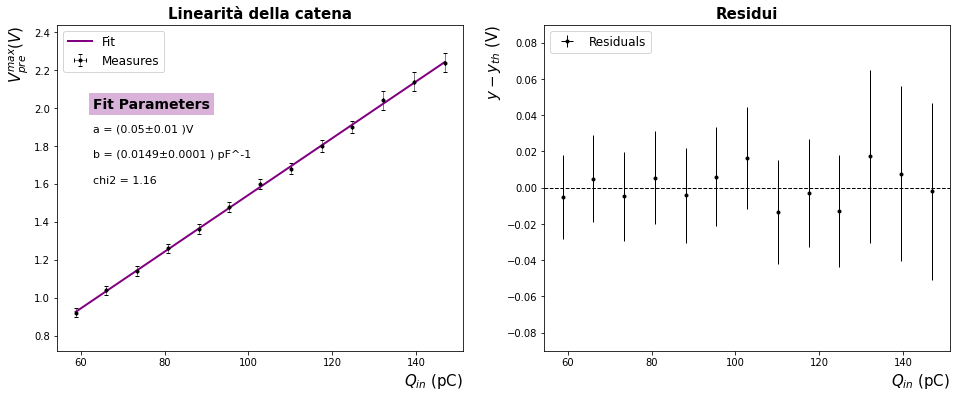

In [258]:

fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

par, cov = curve_fit(f = linfit, xdata = data.Qin, ydata = data.Vpremax, sigma = data.erry)

ax1.errorbar(data.Qin, data.Vpremax, xerr=0, yerr=data.erry, marker = '.',
             elinewidth=0.5, color = 'black', linewidth=0, capsize=2, label = 'Measures')
ax1.plot(data.Qin, linfit(data.Qin, *par_lin), color = 'purple', linewidth = 2, label = 'Fit')

y_max = data.Vpremax.max() + 0.2
y_min = data.Vpremax.min() - 0.2

ax1.set_xlabel('$Q_{in}$ (pC)', fontsize = 15, loc = 'right')
ax1.set_ylabel('$V_{pre}^{max} (V)$', fontsize = 15, loc = 'top')

ax1.set_ylim(bottom = y_min, top = y_max)
ax1.set_title('Linearità della catena', fontsize = 15, fontweight = 800)
ax1.legend(loc = 2 ,prop = {'size': 12}, ncol = 1) 

# calcolo i residui 

y_th = linfit(data.Qin, *par) 
res = data.Vpremax - y_th 

ax2.errorbar(data.Qin, res, xerr = 0, yerr = data.erry, marker = '.', linewidth = 0, elinewidth= 1 , color = 'black', label = 'Residuals')
ax2.axhline(color = 'black', linewidth = 1, linestyle = '--')
ax2.set_ylim( bottom = -0.09, top = 0.09)
ax2.set_xlabel('$Q_{in}$ (pC)', fontsize = 15, loc = 'right')
ax2.set_ylabel('$y - y_{th} $ (V)', fontsize = 15, loc = 'top')
ax2.set_title('Residui', fontsize = 15, fontweight = 800)
ax2.legend( loc = 2, prop = {'size': 12}, ncol = 1)

ax1.text(63, 2, 'Fit Parameters', fontsize = 14, fontweight = 'bold', bbox=dict(facecolor='purple',edgecolor='none', alpha=0.3))
ax1.text(63, 1.6, a + '\n' + b + '\n' + chisq, fontsize = 11, linespacing = 3 )
plt.show()